In [2]:
import pandas as pd                            
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from pandas.plotting import register_matplotlib_converters

data=pd.read_excel("D:\\stock_data\\mapping_merge.xlsx")
data

,Globle_ID,DOCUMENT_ID,DOCUMENT_TYPE,FILING_DATE,MODIFIED_AT,DETAIL_JSONcompany_name,DETAIL_JSONparsing_status,avg_sent_x,sum_sent_x,hit_count_x,...,TRADINGITEMSTATUSNAME,COMPANYNAME,SECURITYNAME,EXCHANGENAME,EXCHANGEIMPORTANCE,SECTOR,SIMPLEINDUSTRYDESCRIPTION,REGION,GMRF_Mapping_COUNTRY,ISIN
0,5417481,163996578,AR,2021-07-30,2021-08-02 15:07:00,Kazakhstan Electricity Grid Operating Company JSC,WARNING,0.407153,31.757929,4742,...,Active,Kazakhstan Electricity Grid Operating Company JSC,Ordinary Shares,Kazakhstan Stock Exchange,742.0,Utilities,Electric Utilities,Asia / Pacific,Kazakhstan,KZ1C00000959
1,5480761,164612143,AR,2021-08-10,2021-08-13 06:25:00,Kcell Joint Stock Company,WARNING,0.564292,53.607734,3841,...,Active,Kcell Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Communication Services,Wireless Telecommunication Services,Asia / Pacific,Kazakhstan,KZ1C00000876
2,6515698,35612471,AR,2017-06-10,2021-09-12 16:37:00,"""Nurbank"" Joint Stock Company",WARNING,-0.083663,-3.430163,2106,...,Inactive,Nurbank Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Financials,Banks,Asia / Pacific,Kazakhstan,KZ000A1CTMU5
3,2518144,117019778,AR,2019-05-30,2021-10-04 00:00:00,Kcell Joint Stock Company,WARNING,3.584056,39.424617,3391,...,Active,Kcell Joint Stock Company,Common Shares,Kazakhstan Stock Exchange,742.0,Communication Services,Wireless Telecommunication Services,Asia / Pacific,Kazakhstan,KZ1C00000876
4,2521306,116754699,AR,2019-05-30,2021-10-04 00:00:00,KazTransOil JSC,WARNING,0.071949,9.137533,7888,...,Active,KazTransOil JSC,Common Shares,Kazakhstan Stock Exchange,742.0,Energy,"Oil, Gas and Consumable Fuels",Asia / Pacific,Kazakhstan,KZ1C00000744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82271,8882908,193753763,AR,2022-10-11,2022-10-12 08:29:00,EcoCash Holdings Zimbabwe Limited,WARNING,0.730089,49.646083,4144,...,Active,EcoCash Holdings Zimbabwe Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Financials,Diversified Financial Services,Africa / Middle East,Zimbabwe,ZW0009012437
82272,8882908,193753763,AR,2022-10-11,2022-10-12 08:29:00,EcoCash Holdings Zimbabwe Limited,WARNING,0.730089,49.646083,4144,...,Active,EcoCash Holdings Zimbabwe Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Financials,Diversified Financial Services,Africa / Middle East,Zimbabwe,ZW0009012361
82273,8985994,194780722,AR,2022-10-29,2022-11-08 05:43:00,Simbisa Brands Limited,WARNING,0.579950,37.116818,2991,...,Active,Simbisa Brands Limited,Ordinary Shares,Zimbabwe Stock Exchange,1469.0,Consumer Discretionary\t,"Hotels, Restaurants and Leisure",Africa / Middle East,Zimbabwe,ZW0009012262
82274,9156117,197325825,AR,2022-12-21,2022-12-21 16:00:00,CAFCA Limited,SUCCESS,0.124659,4.363052,1485,...,Active,CAFCA Limited,Ordinary Shares,The Johannesburg Securities Exchange,1187.0,Industrials,Electrical Equipment,Africa / Middle East,Zimbabwe,ZW0009011942


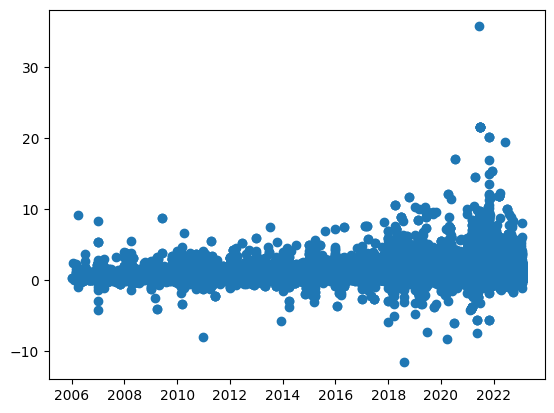

In [54]:
para="avg_sent_x"


data=data.sort_values("FILING_DATE")
x=data["FILING_DATE"]
y=data[para]
# print(type(x[1]))
plt.scatter(x,y)

In [55]:
data1=data.set_index("FILING_DATE",drop=False)
data1
grouped=data1.groupby(data1.index.to_period(freq='m'))
# data.\
# grouped.size()
group1=grouped[para].mean()
group1=group1.reset_index()


In [56]:
start_day1="2005-01-01"
end_day1="2020-01-01"
start_day2="2020-01-01"
end_day2="2023-02-28"
data_p1=group1[(group1['FILING_DATE']>=start_day1 )&(group1['FILING_DATE']<end_day1 )]
data_p2=group1[(group1['FILING_DATE']>=start_day2 )&(group1['FILING_DATE']<=end_day2 )]
data_p2
# for i in range(len(data_p1))
list1=np.zeros(len(data_p1))
list2=np.ones(len(data_p2))
dummy=np.concatenate((list1,list2))

dummy=pd.DataFrame(dummy,columns=["dummy"])
# dummy.rename(index={'dummy':'aa'},inplace=True)

# list1
dummy

# len(data_p1['FILING_DATE'])

,dummy
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
202,1.0
203,1.0
204,1.0
205,1.0


     avg_sent_x  dummy
0      0.326164    0.0
1      0.872796    0.0
2      0.310300    0.0
3      0.579901    0.0
4      0.436311    0.0
..          ...    ...
202    0.434237    1.0
203    0.343223    1.0
204    0.415476    1.0
205    0.556501    1.0
206    0.423316    1.0

[207 rows x 2 columns]


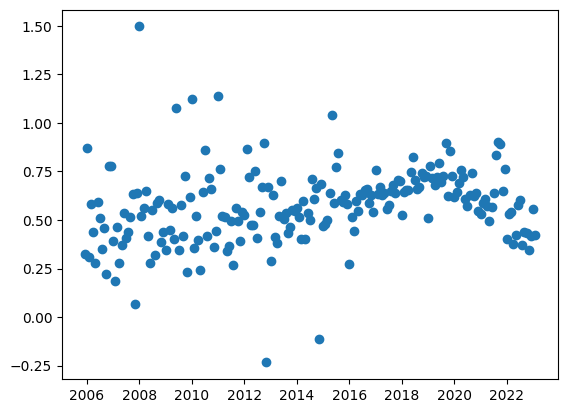

In [57]:
group1
# grouped.size()
x1=group1["FILING_DATE"].astype(str)
x1=pd.to_datetime(x1)

y1=group1[para]

new_y1=pd.concat([y1,dummy],axis=1)
# new_y1=y1.append(dummy)
print(new_y1)
# type(x1[1])
plt.scatter(x1,y1)
# x1

In [58]:
# type(x1)
# x_d=x1.diff(1)
# x1
x_d=pd.Series(range(len(x1)))
# type(x_d)
x_d

0        0
1        1
2        2
3        3
4        4
      ... 
202    202
203    203
204    204
205    205
206    206
Length: 207, dtype: int64

In [59]:
x_d1=x_d.values.reshape(len(x_d),1)
# new_y1.shape
# np.reshape(x_d,(len(x_d),1))
x_d1.shape

(207, 1)

In [60]:


slope1, intercept1, r_value,p_value,stderr= scipy.stats.linregress(
    x_d,y1)
print("slope: "+str(slope1))
print("intercept: "+str(intercept1))
print("r_value:"+str(r_value))
print("p_value:"+str(p_value))
print("stderror:"+str(stderr))
residual1=y1-(intercept1+x_d*slope1)
residual1.name="residual1"
print(residual1.head())

# text=[]
# text.append("{0:}={1:.2f}{2:}{3:+.2f}".format(ticker_B,slope,ticker_A,intercept))
# textbox(text,"regress_formula")

slope: 0.00075576684075271
intercept: 0.4923794565810074
r_value:0.23132795664899272
p_value:0.0007974415814929818
stderror:0.00022199346714463314
0   -0.166215
1    0.379661
2   -0.183591
3    0.085255
4   -0.059091
Name: residual1, dtype: float64


In [61]:
## SSE
residual1_square=residual1*residual1
SSE=residual1_square.sum()
print("SSE= "+str(SSE))
## MSE
MSE=SSE/len(x_d)
print("MSE= "+str(MSE))


SSE= 7.46713329796906
MSE= 0.03607310771965729


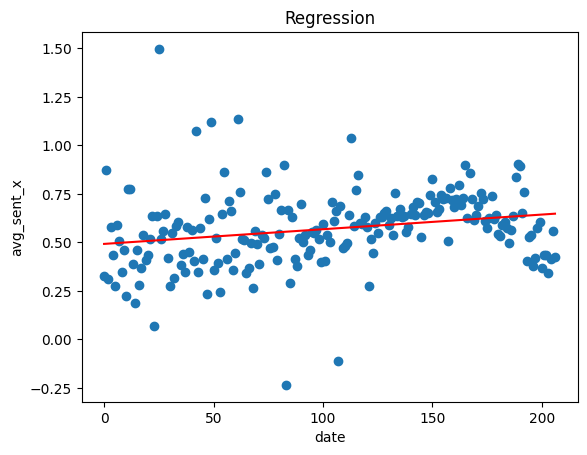

In [62]:
plt.scatter(x_d,y1,label="prices")
plt.plot(x_d,intercept1+x_d*slope1,color="red",label="regression")
plt.xlabel("date")
plt.ylabel(para)
plt.title("Regression")
# legend("bottom")
# saver("regression")
plt.show()
plt.close()

## Analyze residual and noise

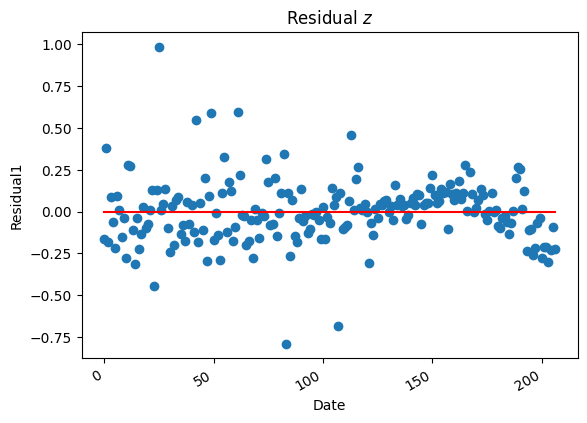

0.1903896527993412


In [63]:
plt.figure()
plt.scatter(residual1.index,residual1,label="signal")
plt.plot(x_d,np.zeros(len(x_d)),color="red",label="regression")
plt.ylabel("Residual1")
plt.xlabel("Date")
plt.title(r"Residual $z$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()
print(residual1.std())

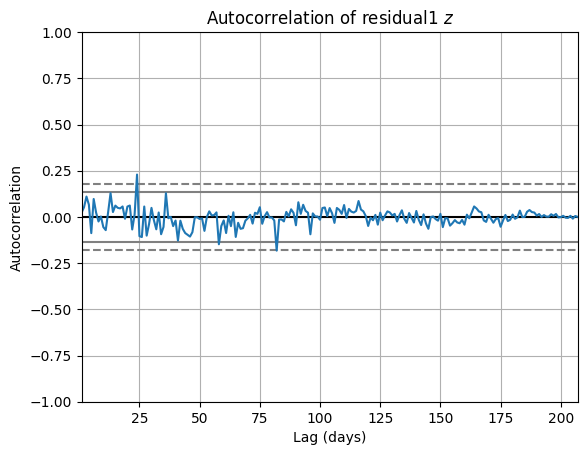

In [64]:
from pandas.plotting import autocorrelation_plot
plt.figure()
autocorrelation_plot(residual1)
plt.title(r"Autocorrelation of residual1 $z$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

In [65]:
residual1_lagged=residual1.shift(periods=1)
residual1_lagged.name="residual1_lagged"
DF=pd.concat([residual1,residual1_lagged],axis=1)
print(DF.head())
DF=DF.dropna(axis="index")
print(DF.head())

   residual1  residual1_lagged
0  -0.166215               NaN
1   0.379661         -0.166215
2  -0.183591          0.379661
3   0.085255         -0.183591
4  -0.059091          0.085255
   residual1  residual1_lagged
1   0.379661         -0.166215
2  -0.183591          0.379661
3   0.085255         -0.183591
4  -0.059091          0.085255
5  -0.218085         -0.059091


In [66]:
slope_R, intercept_R, _, _, _ = scipy.stats.linregress(
    DF["residual1_lagged"],DF["residual1"])
print("AR slope: "+str(slope_R))
print("AR intercept: "+str(intercept_R))
noise1=DF["residual1"]-(intercept_R+DF["residual1_lagged"]*slope_R)
noise1_std=np.std(noise1)
noise1_normalized=noise1/noise1_std
print("noise1 mean",np.mean(noise1))
print("noise1 std: ",noise1_std)

AR slope: 0.023628614207186215
AR intercept: 0.0007810918264628006
noise1 mean 5.928375374212001e-18
noise1 std:  0.18998251007570147


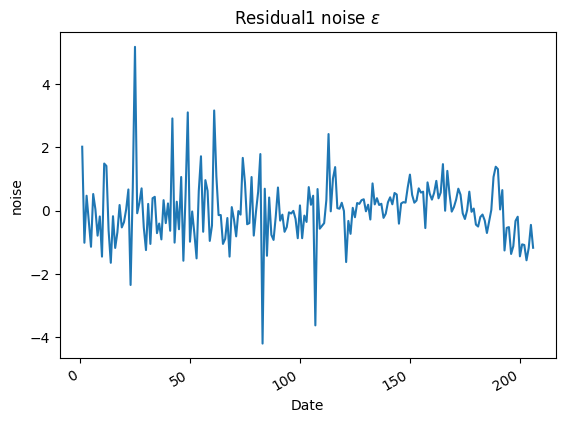

In [67]:
plt.figure()
plt.plot(noise1_normalized.index,noise1_normalized,label="dW")
plt.ylabel("noise")
plt.xlabel("Date")
plt.title(r"Residual1 noise $\varepsilon$")
plt.gcf().autofmt_xdate()
plt.show()
plt.close()

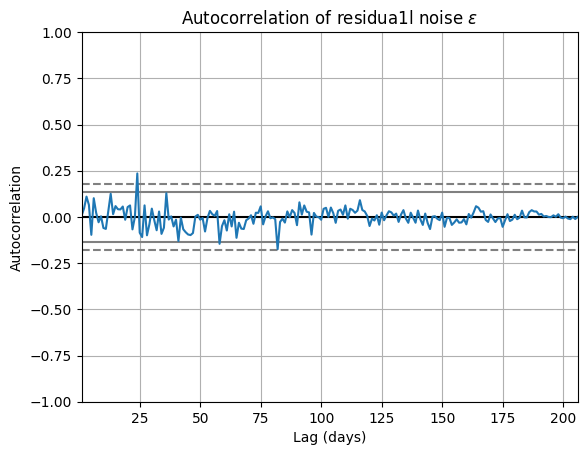

In [68]:
plt.figure()
autocorrelation_plot(noise1)
plt.title(r"Autocorrelation of residua1l noise $\varepsilon$")
plt.xlabel("Lag (days)")
plt.show()
plt.close()

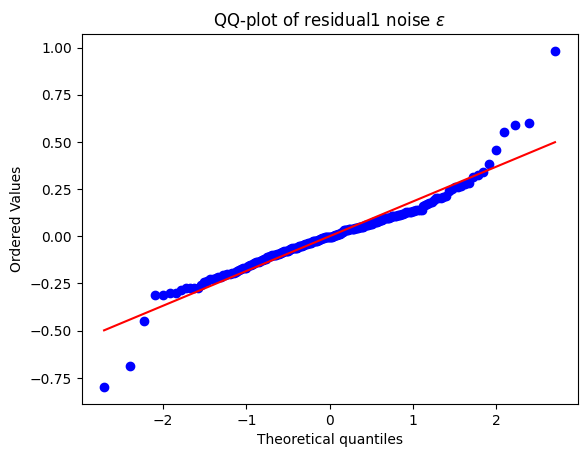

In [69]:
scipy.stats.probplot(noise1.values, dist="norm", plot=plt)
plt.title(r"QQ-plot of residual1 noise $\varepsilon$")
plt.show()
plt.close()

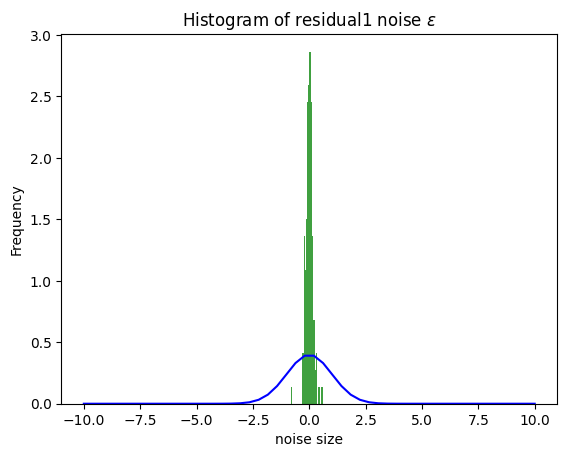

In [70]:
xvals=np.linspace(start=-10,stop=10)
fvals=scipy.stats.norm.pdf(xvals)
plt.figure()
plt.hist(noise1, 50, facecolor='green', alpha=0.75,density=True,label="empirical")
plt.plot(xvals,fvals,label="standard Gaussian",color="blue")
plt.xlabel("noise size")
plt.ylabel("Frequency")
plt.title(r"Histogram of residual1 noise $\varepsilon$")

plt.show()
plt.close()